# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import pandas as pd

In [3]:
## Making the matplotlib plots look nicer
settings = {
    'font.size':12,
    'font.family': "serif",
    'axes.linewidth':0.8,
    'xtick.major.size':6.0,
    'xtick.minor.size':3.0,
    'xtick.major.width':1,
    'xtick.minor.width':1,
    'xtick.direction':'in',
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':3.0,
    'ytick.major.width':1,
    'ytick.minor.width':1,
    'ytick.direction':'in',
    'ytick.minor.visible':True,
    'ytick.right':True
}

plt.rcParams['figure.dpi'] = 100
plt.rcParams.update(**settings)

# Mounting Drive

In [4]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd '/content/drive/MyDrive/192 falling objects data/csv processed data'

/content/drive/MyDrive/192 falling objects data/csv processed data


In [6]:
ls

bb_1.csv  bb_3.csv  bb.csv    mb_2.csv  mb_4.csv  sb_1.csv  sb_3.csv  sb.csv
bb_2.csv  bb_4.csv  mb_1.csv  mb_3.csv  mb.csv    sb_2.csv  sb_4.csv


# Loading Data

In [7]:
sb = pd.read_csv("sb.csv")
sb_1 = pd.read_csv("sb_1.csv")
sb_2 = pd.read_csv("sb_2.csv")
sb_3 = pd.read_csv("sb_3.csv")
sb_4 = pd.read_csv("sb_4.csv")

mb = pd.read_csv("mb.csv")
mb_1 = pd.read_csv("mb_1.csv")
mb_2 = pd.read_csv("mb_2.csv")
mb_3 = pd.read_csv("mb_3.csv")
mb_4 = pd.read_csv("mb_4.csv")

bb = pd.read_csv("bb.csv")
bb_1 = pd.read_csv("bb_1.csv")
bb_2 = pd.read_csv("bb_2.csv")
bb_3 = pd.read_csv("bb_3.csv")
bb_4 = pd.read_csv("bb_4.csv")

In [8]:
bb

,Time,Position,Velocity
0,1.00,0.318,1.810
1,1.05,0.422,2.255
2,1.10,0.544,2.661
3,1.15,0.688,3.067
4,1.20,0.852,3.437
5,1.25,1.033,3.773
6,1.30,1.234,3.878


# Data

In [9]:
n_trials = 5
labels = ["small ball", "medium ball", "big ball"]

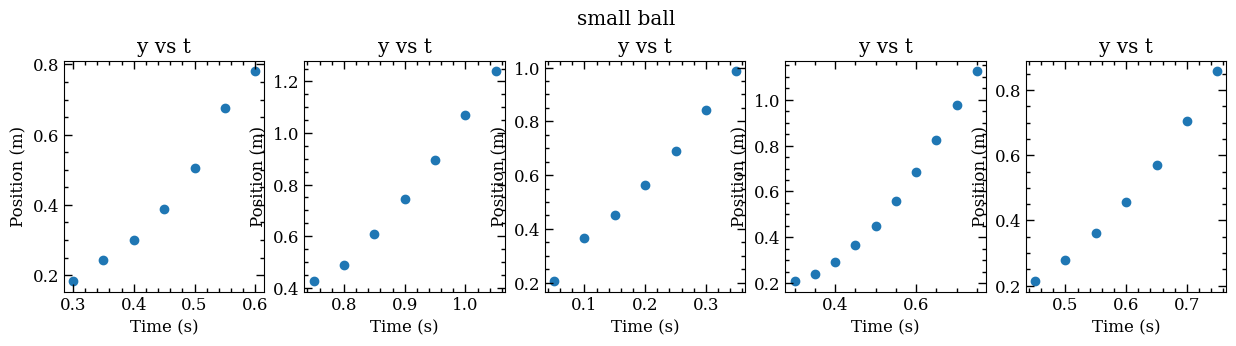

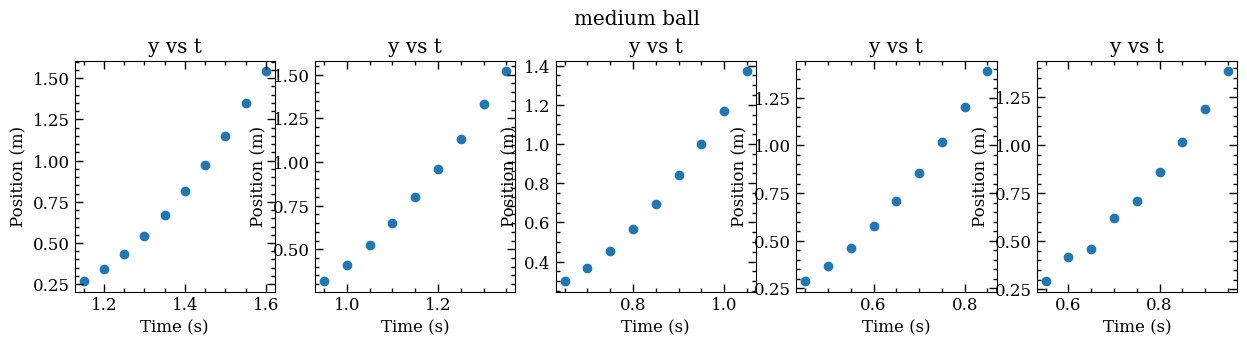

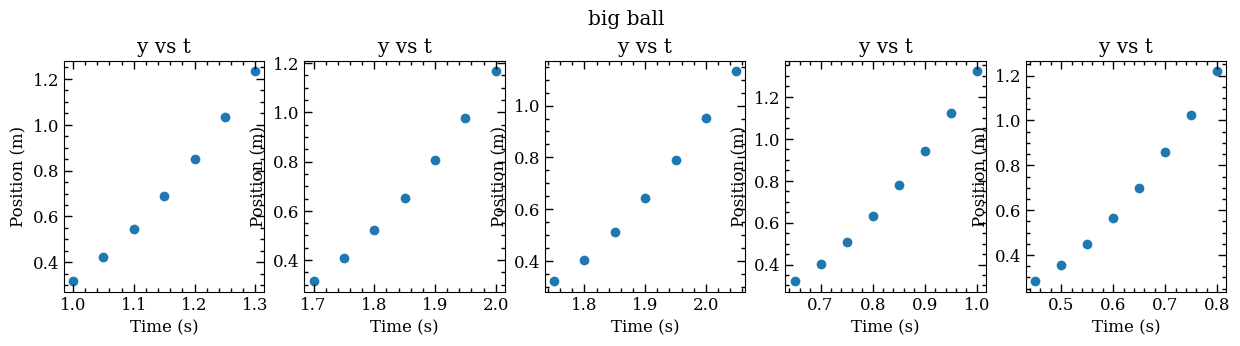

In [10]:
sb_data = [sb, sb_1, sb_2, sb_3, sb_4]
mb_data = [mb, mb_1, mb_2, mb_3, mb_4]
bb_data = [bb, bb_1, bb_2, bb_3, bb_4]

balls_data = [sb_data, mb_data, bb_data]

for i, ball in enumerate(balls_data):
    fig, ax = plt.subplots(1, n_trials, figsize=(15, 3))
    ax[0].scatter(ball[0]["Time"], ball[0]["Position"])
    ax[0].set_title("y vs t")
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Position (m)")

    ax[1].scatter(ball[1]["Time"], ball[1]["Position"])
    ax[1].set_title("y vs t")
    ax[1].set_xlabel("Time (s)")
    ax[1].set_ylabel("Position (m)")

    ax[2].scatter(ball[2]["Time"], ball[2]["Position"])
    ax[2].set_title("y vs t")
    ax[2].set_xlabel("Time (s)")
    ax[2].set_ylabel("Position (m)")

    ax[3].scatter(ball[3]["Time"], ball[3]["Position"])
    ax[3].set_title("y vs t")
    ax[3].set_xlabel("Time (s)")
    ax[3].set_ylabel("Position (m)")

    ax[4].scatter(ball[4]["Time"], ball[4]["Position"])
    ax[4].set_title("y vs t")
    ax[4].set_xlabel("Time (s)")
    ax[4].set_ylabel("Position (m)")
    fig.suptitle(labels[i], y=1.05)

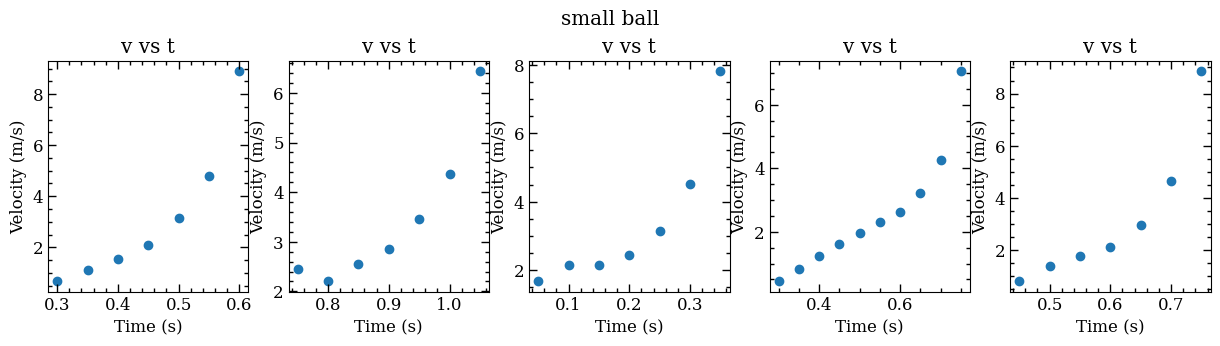

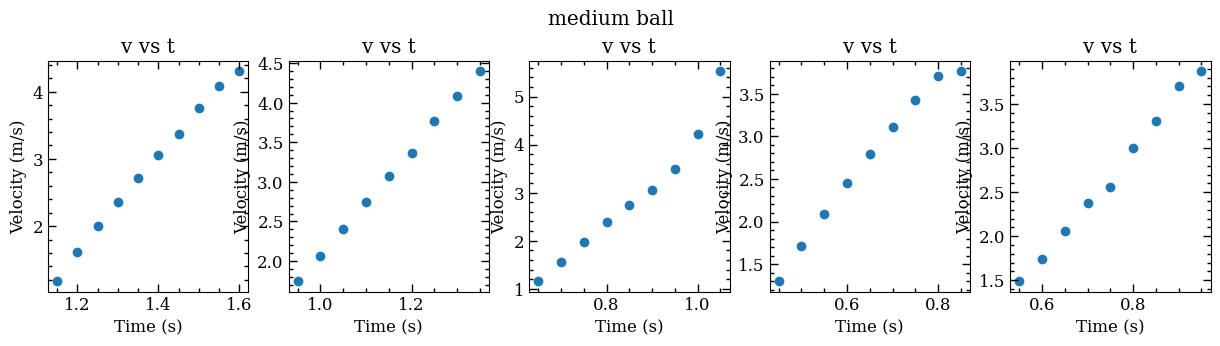

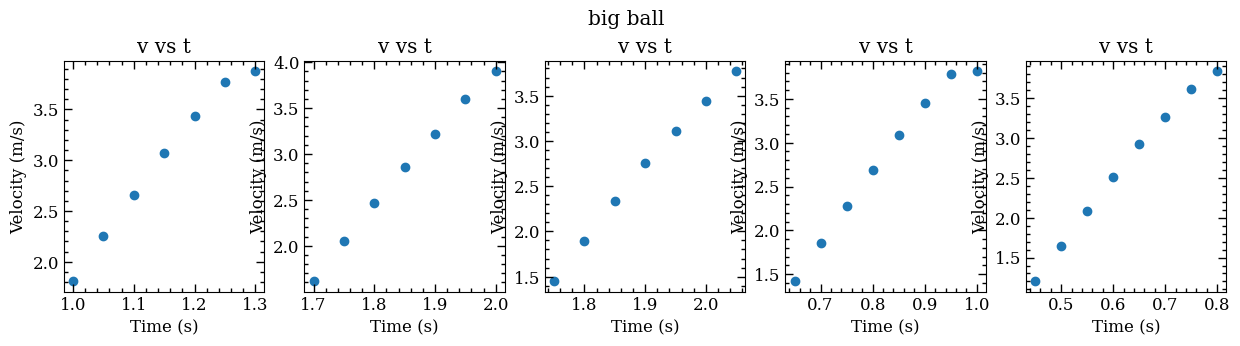

In [11]:
for i, ball in enumerate(balls_data):
    fig, ax = plt.subplots(1, n_trials, figsize=(15, 3))
    ax[0].scatter(ball[0]["Time"], ball[0]["Velocity"])
    ax[0].set_title("v vs t")
    ax[0].set_xlabel("Time (s)")
    ax[0].set_ylabel("Velocity (m/s)")

    ax[1].scatter(ball[1]["Time"], ball[1]["Velocity"])
    ax[1].set_title("v vs t")
    ax[1].set_xlabel("Time (s)")
    ax[1].set_ylabel("Velocity (m/s)")

    ax[2].scatter(ball[2]["Time"], ball[2]["Velocity"])
    ax[2].set_title("v vs t")
    ax[2].set_xlabel("Time (s)")
    ax[2].set_ylabel("Velocity (m/s)")

    ax[3].scatter(ball[3]["Time"], ball[3]["Velocity"])
    ax[3].set_title("v vs t")
    ax[3].set_xlabel("Time (s)")
    ax[3].set_ylabel("Velocity (m/s)")

    ax[4].scatter(ball[4]["Time"], ball[4]["Velocity"])
    ax[4].set_title("v vs t")
    ax[4].set_xlabel("Time (s)")
    ax[4].set_ylabel("Velocity (m/s)")
    fig.suptitle(labels[i], y=1.05)

In [12]:
# small, medium, large
radii = [0.031, 0.05, 0.08562535938]
masses = [0.0018, 0.0081, 0.0369]

# Function

In [13]:
t = np.linspace(0, 10, 1000)
rho = 1.184
mu = 0.00001849
g = 9.81

In [14]:
def k(m):
  k = np.sqrt(mu ** 2 + (m* g * rho)/(108 * np.pi))
  return k

def velocity(t, k, R, m):
  v = 18/(rho * R) * (k * np.tanh((6 * np.pi * k * R * t) / m) + np.arctanh(mu / k) - mu)
  return v

def position(t, k, R, m):
  y = ((3 * m)/(np.pi * R**2 * rho)) * np.log(np.cosh((6 * np.pi * R * t * k)/m - mu + np.arctanh(mu/k)))
  return y

In [15]:
x_list, v_list = [], []
for R, m in zip(radii, masses):
  kappa = k(m)
  y = position(t, kappa, R, m)
  v  = velocity(t, kappa, R, m)

  x_list.append(y)
  v_list.append(v)

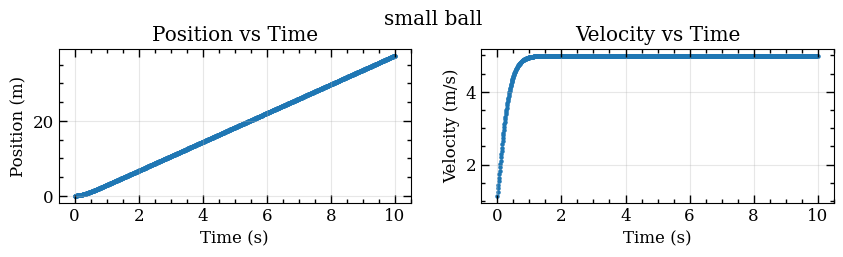

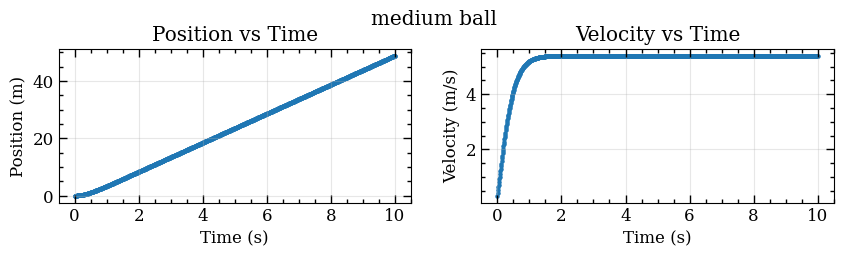

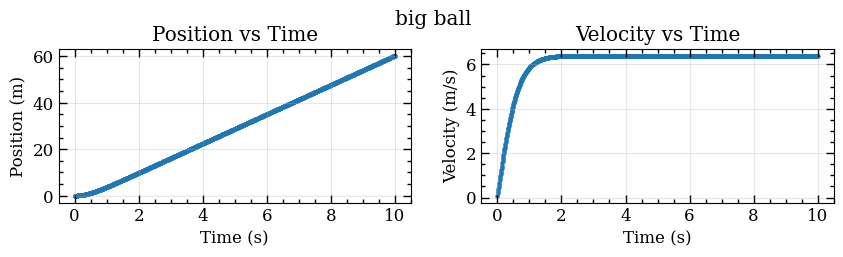

In [16]:
for i in range(len(v_list)):
  fig, ax = plt.subplots(1,2, figsize=(10,2))

  ax[0].scatter(t, x_list[i], s=5)
  ax[0].set_xlabel("Time (s)")
  ax[0].set_ylabel("Position (m)")
  ax[0].set_title("Position vs Time")
  ax[0].grid(True, alpha=0.3)

  ax[1].scatter(t, v_list[i], s=5)
  ax[1].set_xlabel("Time (s)")
  ax[1].set_ylabel("Velocity (m/s)")
  ax[1].set_title("Velocity vs Time")
  ax[1].grid(True, alpha=0.3)

  fig.suptitle(labels[i], y=1.075)

#  Goodness of Fit

- The *chi-squared statistic* measures the difference between observed and expected frequencies. A larger value indicates a greater discrepancy between what was observed and what was expected under the null hypothesis.

- Low *p-value* (typically ≤ 0.05): This suggests strong evidence against the null hypothesis. In a chi-squared test of independence, this means you reject the null hypothesis.
- alpha is the significance level: alpha = 0.05

In [57]:
alpha = 0.05

In [64]:
idx_sb = 0
idx_mb = 1
idx_bb = 2

### Small Ball

SMALL BALL
Trial 0
POSITION chi2: 2.3359882864599015 || p-value: 0.88635272
VELOCITY chi2: 86.76800928859733 || p-value: 0.00000000


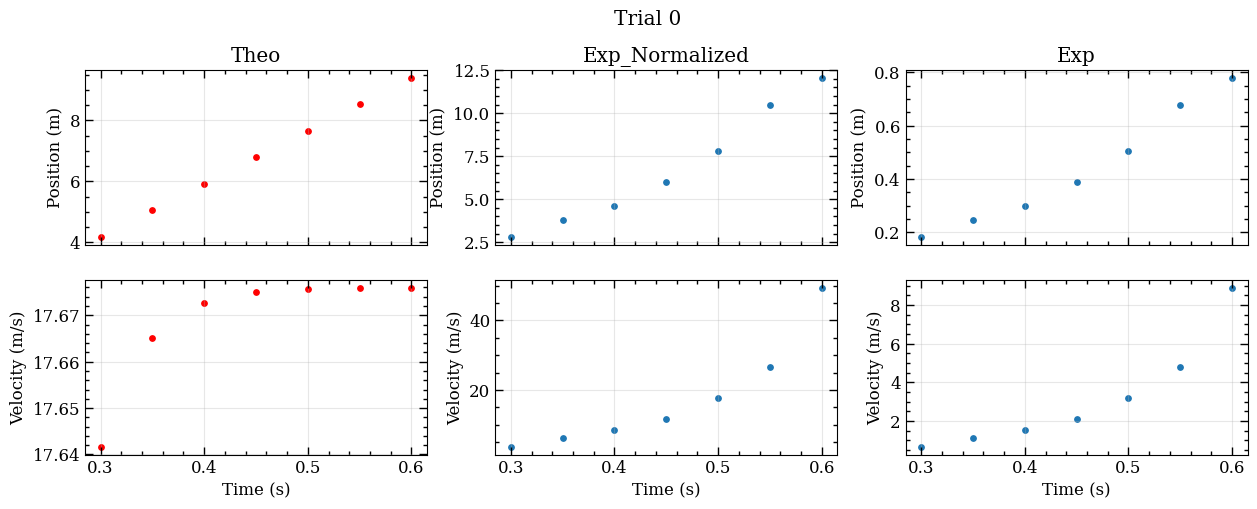

----
Trial 1
POSITION chi2: 5.859222726426744 || p-value: 0.43914356
VELOCITY chi2: 19.75750061135122 || p-value: 0.00305841


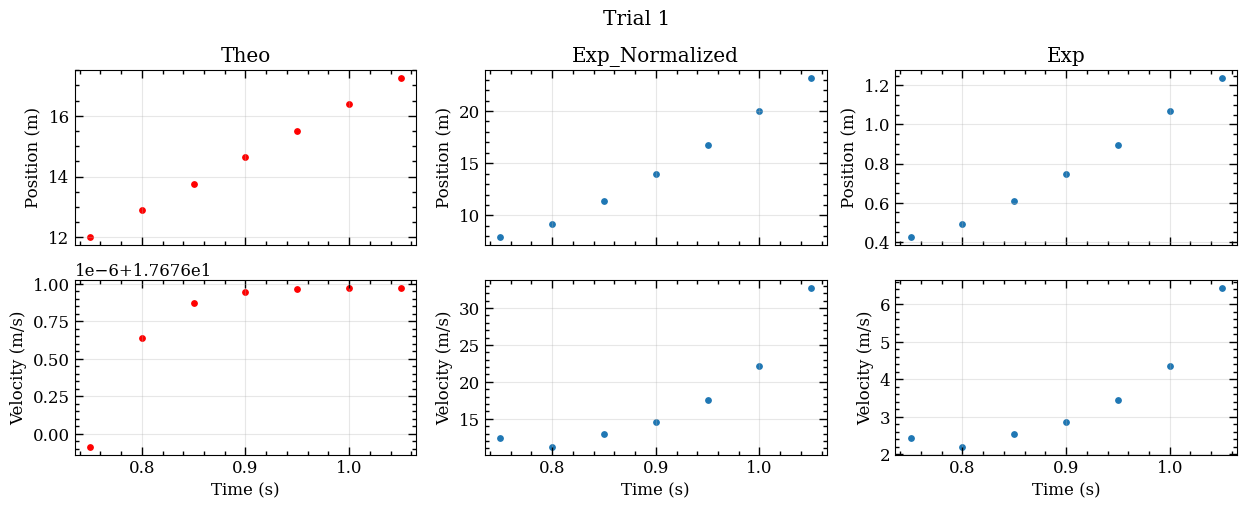

----
Trial 2
POSITION chi2: 2.7077132315482877 || p-value: 0.84453540
VELOCITY chi2: 26.981760825757632 || p-value: 0.00014595


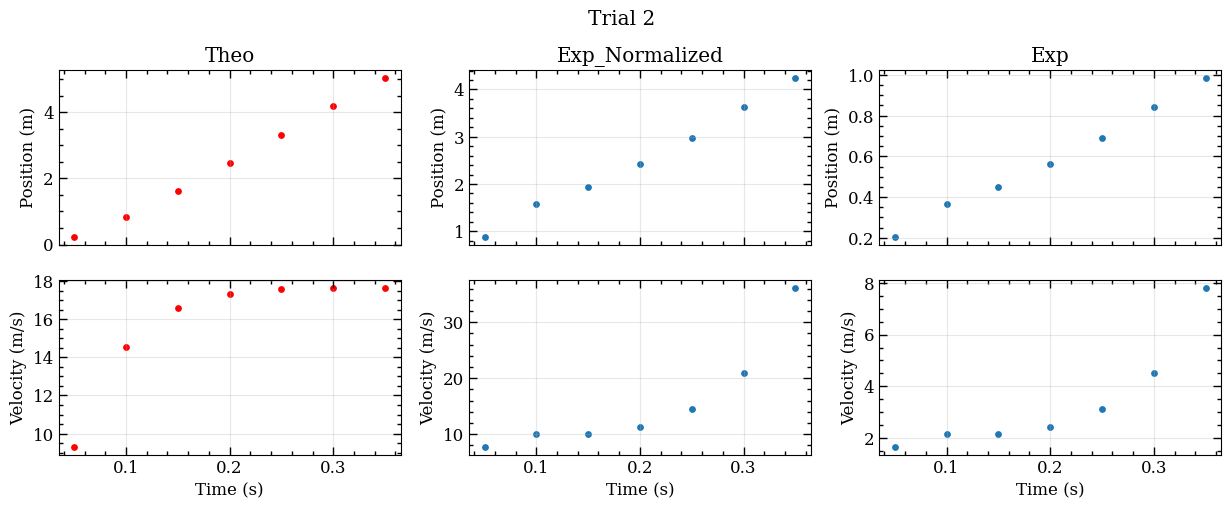

----
Trial 3
POSITION chi2: 4.231300680790365 || p-value: 0.89553989
VELOCITY chi2: 92.13591538732678 || p-value: 0.00000000


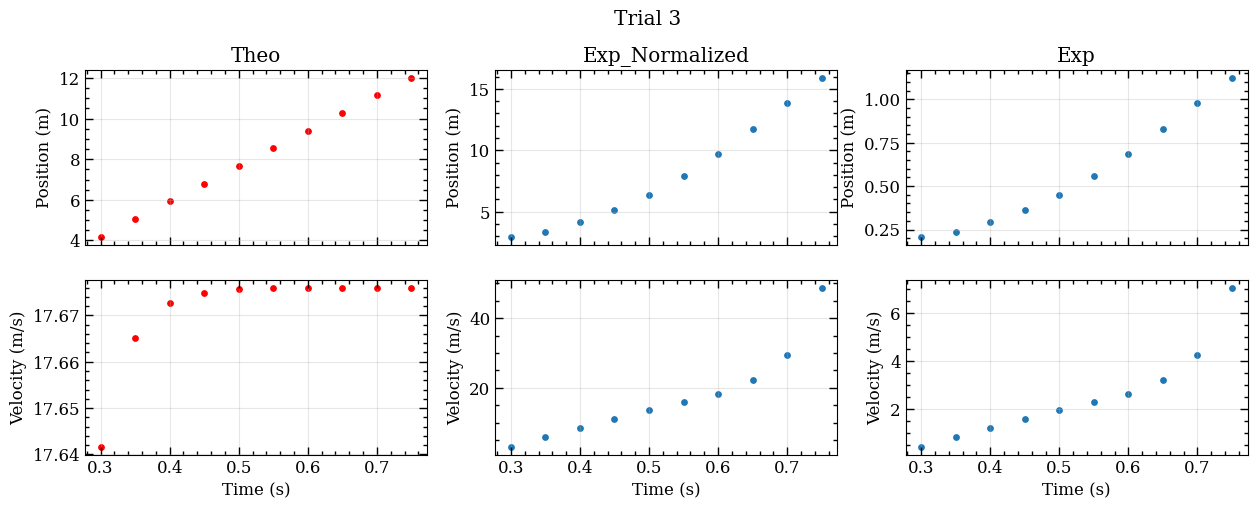

----
Trial 4
POSITION chi2: 4.274373634684066 || p-value: 0.63960022
VELOCITY chi2: 79.11273598002424 || p-value: 0.00000000


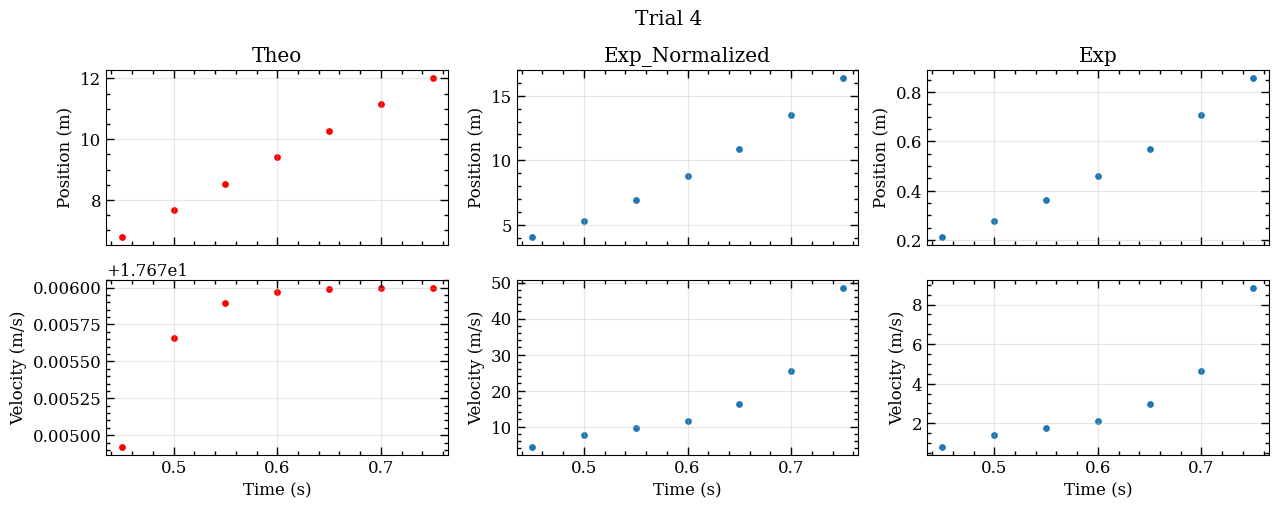

----


In [107]:
print("SMALL BALL")
# Theoretical
y_theo_list_sb, v_theo_list_sb = [], []
y_exp_normalized_list_sb, v_exp_normalized_list_sb = [], []

# Results
y_chi2_sb, y_pvalue_sb = [], []
v_chi2_sb, v_pvalue_sb = [], []

for i, data in enumerate(sb_data):
  print(f"Trial {i}")
  idx = idx_sb
  # get ball data
  t = data["Time"].values # use this time intervals for theo for direct comparison
  y_exp = data["Position"]
  v_exp = data["Velocity"]

  # get theoretical x and v
  y_theo = position(t, kappa, radii[idx], masses[idx])
  v_theo = velocity(t, kappa, radii[idx], masses[idx])
  # normalize data for compatibility
  y_exp_normalized = y_exp * (np.sum(y_theo) / np.sum(y_exp))
  v_exp_normalized = v_exp * (np.sum(v_theo) / np.sum(v_exp))
  # get chi2 for position data
  y_chi2_stat, y_pvalue = chisquare(y_exp_normalized, y_theo)
  # get chi2 for velocity data
  v_chi2_stat, v_pvalue = chisquare(v_exp_normalized, v_theo)

  print(f"POSITION chi2: {y_chi2_stat} || p-value: {y_pvalue:.8f}")
  print(f"VELOCITY chi2: {v_chi2_stat} || p-value: {v_pvalue:.8f}")

  # Store results
  y_theo_list_sb.append(y_theo)
  v_theo_list_sb.append(v_theo)
  y_exp_normalized_list_sb.append(y_exp_normalized)
  v_exp_normalized_list_sb.append(v_exp_normalized)

  y_chi2_sb.append(y_chi2_stat)
  y_pvalue_sb.append(y_pvalue)
  v_chi2_sb.append(v_chi2_stat)
  v_pvalue_sb.append(v_pvalue)

  # Plot
  fig, ax = plt.subplots(2,3, figsize=(15,5), sharex="col")

  # Position
  ax[0,0].scatter(t, y_theo, s=15, color="red")
  ax[0,0].set_ylabel("Position (m)")
  ax[0,0].set_title("Theo")
  ax[0,0].grid(True, alpha=0.3)

  ax[0,1].scatter(t, y_exp_normalized, s=15)
  ax[0,1].set_ylabel("Position (m)")
  ax[0,1].set_title("Exp_Normalized")
  ax[0,1].grid(True, alpha=0.3)

  ax[0,2].scatter(t, y_exp, s=15)
  ax[0,2].set_ylabel("Position (m)")
  ax[0,2].set_title("Exp")
  ax[0,2].grid(True, alpha=0.3)

  # Velocity
  ax[1,0].scatter(t, v_theo, s=15, color="red")
  ax[1,0].set_xlabel("Time (s)")
  ax[1,0].set_ylabel("Velocity (m/s)")
  ax[1,0].grid(True, alpha=0.3)

  ax[1,1].scatter(t, v_exp_normalized, s=15)
  ax[1,1].set_xlabel("Time (s)")
  ax[1,1].set_ylabel("Velocity (m/s)")
  ax[1,1].grid(True, alpha=0.3)

  ax[1,2].scatter(t, v_exp, s=15)
  ax[1,2].set_xlabel("Time (s)")
  ax[1,2].set_ylabel("Velocity (m/s)")
  ax[1,2].grid(True, alpha=0.3)

  fig.suptitle(f"Trial {i}", y=1.0)
  plt.show()
  print("----")

#### Overlay

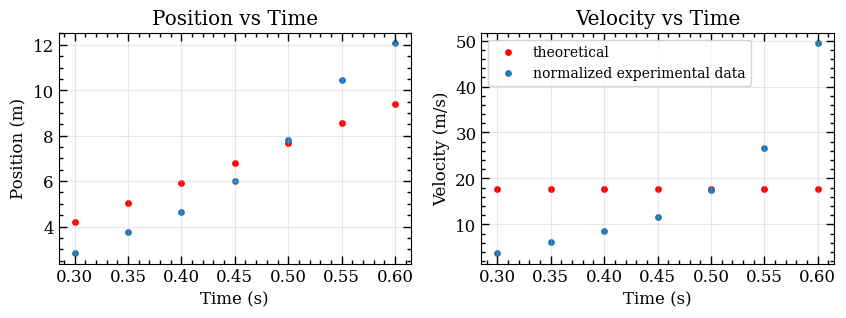

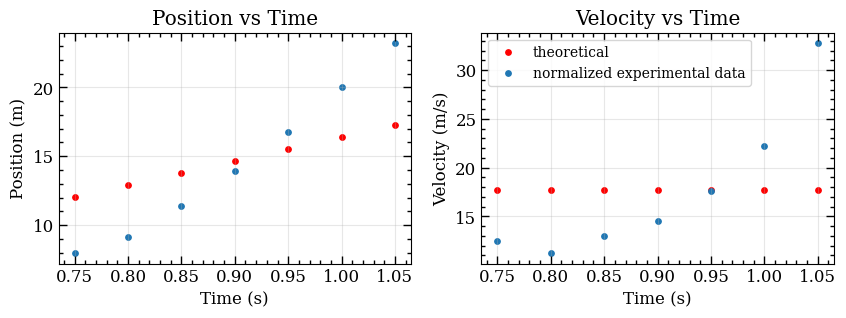

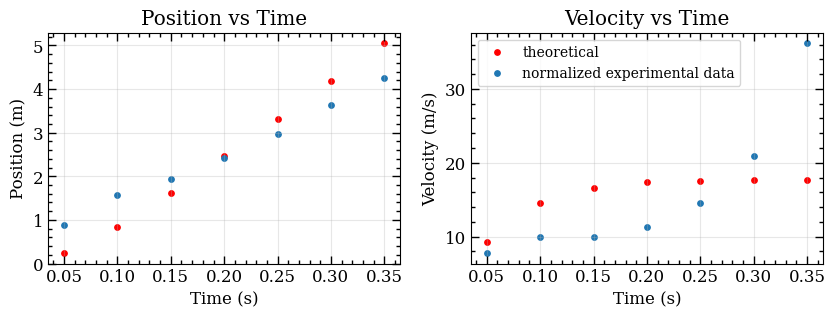

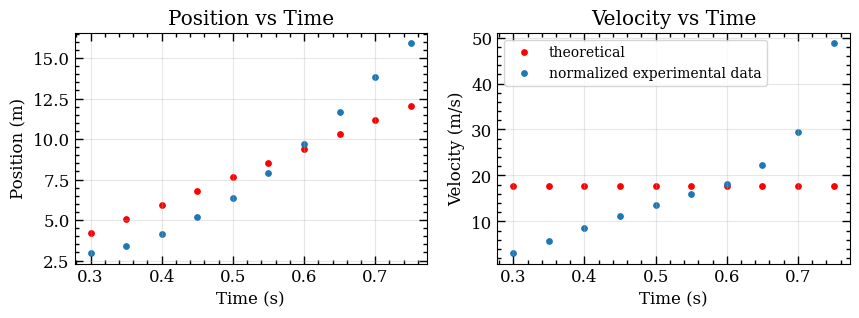

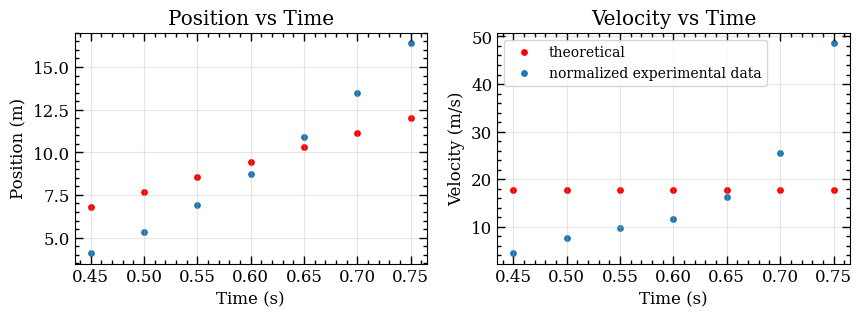

In [108]:
# Overlay normalized experimental data with theoretical
for i, data in enumerate(sb_data):
  t = data["Time"]
  fig, ax = plt.subplots(1,2,figsize=(10,3))
  ax[0].scatter(t, y_theo_list_sb[i], s=15, color="red", label="theoretical")
  ax[0].scatter(t, y_exp_normalized_list_sb[i], s=15, label="normalized experimental data")
  ax[0].set_xlabel("Time (s)")
  ax[0].set_ylabel("Position (m)")
  ax[0].set_title("Position vs Time")
  ax[0].grid(True, alpha=0.3)
  ax[1].legend(fontsize=10)

  ax[1].scatter(t, v_theo_list_sb[i], s=15, color="red", label="theoretical")
  ax[1].scatter(t, v_exp_normalized_list_sb[i], s=15, label="normalized experimental data")
  ax[1].set_xlabel("Time (s)")
  ax[1].set_ylabel("Velocity (m/s)")
  ax[1].set_title("Velocity vs Time")
  ax[1].grid(True, alpha=0.3)
  ax[1].legend(fontsize=10)

  plt.show()

#### Results

In [100]:
df_sb = pd.DataFrame()
df_sb["y_chi2"] = y_chi2_sb
df_sb["y_pvalue"] = y_pvalue_sb
df_sb["v_chi2"] = v_chi2_sb
df_sb["v_pvalue"] = v_pvalue_sb

df_sb

,y_chi2,y_pvalue,v_chi2,v_pvalue
0,2.335988,0.886353,86.768009,1.419742e-16
1,5.859223,0.439144,19.757501,3.058409e-03
2,2.707713,0.844535,26.981761,1.459513e-04
3,4.231301,0.895540,92.135915,6.063311e-16
4,4.274374,0.639600,79.112736,5.448033e-15


In [101]:
# Get summary statistics
df_sb.describe()

,y_chi2,y_pvalue,v_chi2,v_pvalue
count,5.000000,5.000000,5.000000,5.000000e+00
mean,3.881720,0.741034,60.951184,6.408720e-04
std,1.410184,0.198197,34.711955,1.352921e-03
min,2.335988,0.439144,19.757501,1.419742e-16
25%,2.707713,0.639600,26.981761,6.063311e-16
50%,4.231301,0.844535,79.112736,5.448033e-15
75%,4.274374,0.886353,86.768009,1.459513e-04
max,5.859223,0.895540,92.135915,3.058409e-03


### Medium Ball

MEDIUM BALL
Trial 0
POSITION chi2: 20.07341351772041 || p-value: 0.01746471
VELOCITY chi2: 13.587684568118583 || p-value: 0.13776653


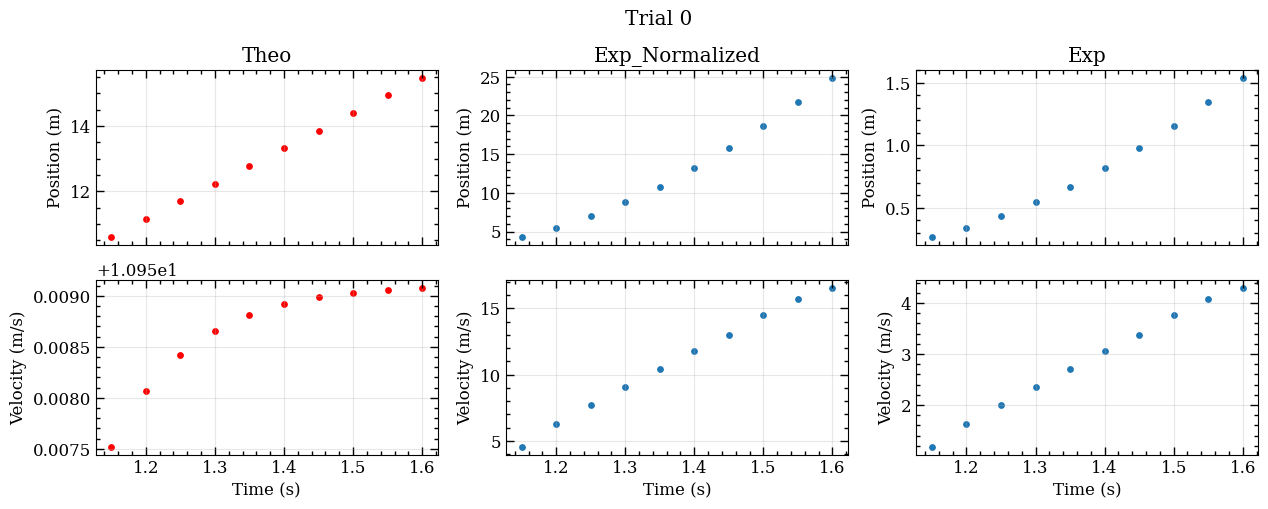

----
Trial 1
POSITION chi2: 10.624351385678894 || p-value: 0.22390552
VELOCITY chi2: 7.734343319014043 || p-value: 0.45984114


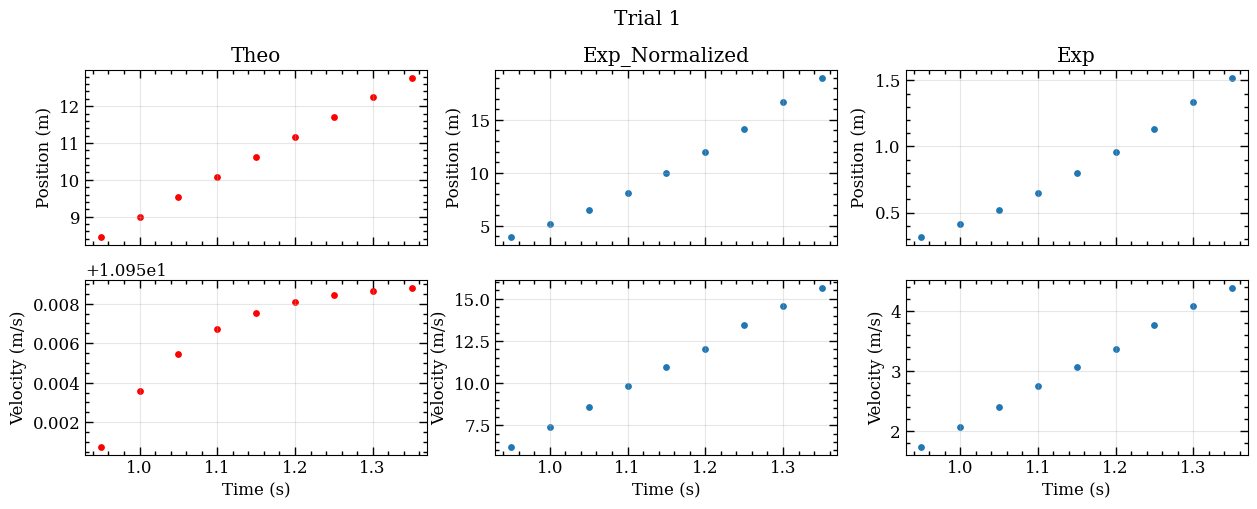

----
Trial 2
POSITION chi2: 5.151264880770325 || p-value: 0.74129319
VELOCITY chi2: 19.318622354012405 || p-value: 0.01324546


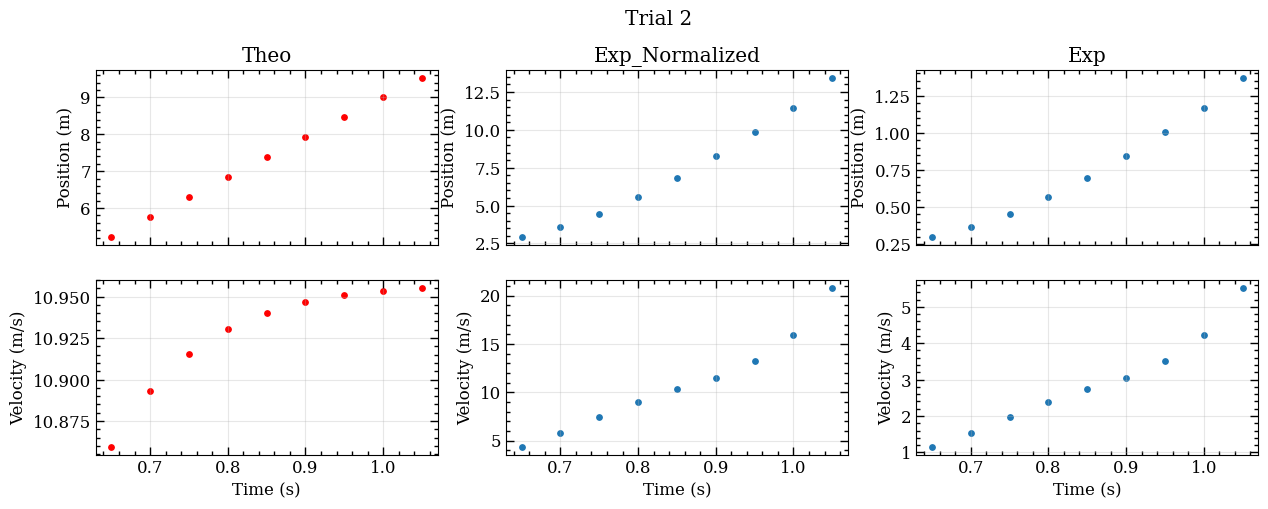

----
Trial 3
POSITION chi2: 2.1459421100480074 || p-value: 0.97620759
VELOCITY chi2: 8.411763793299547 || p-value: 0.39431516


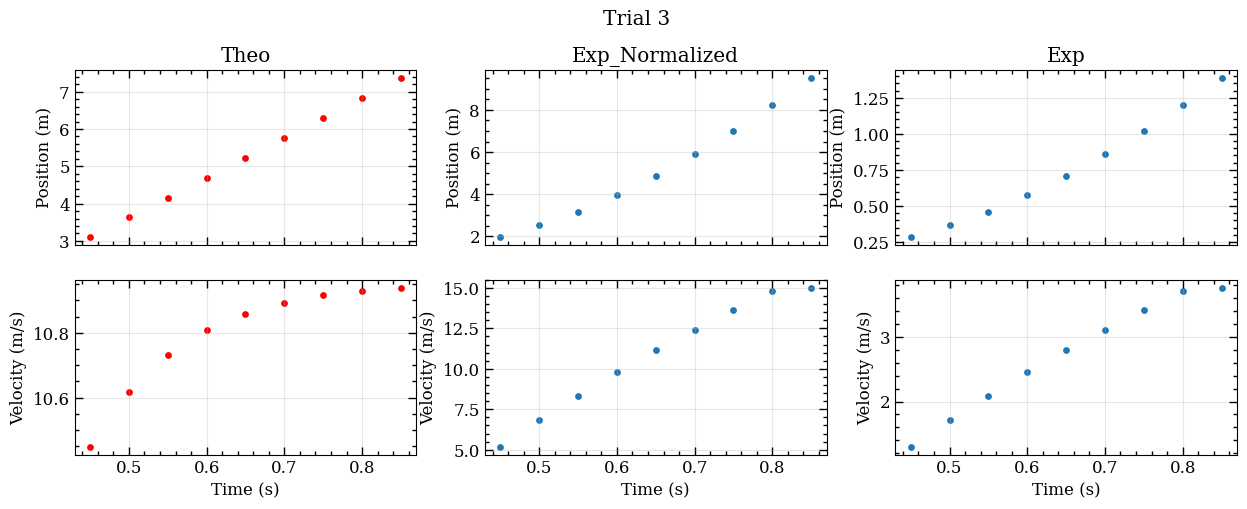

----
Trial 4
POSITION chi2: 3.1501078911096396 || p-value: 0.92458711
VELOCITY chi2: 8.41338388843724 || p-value: 0.39416544


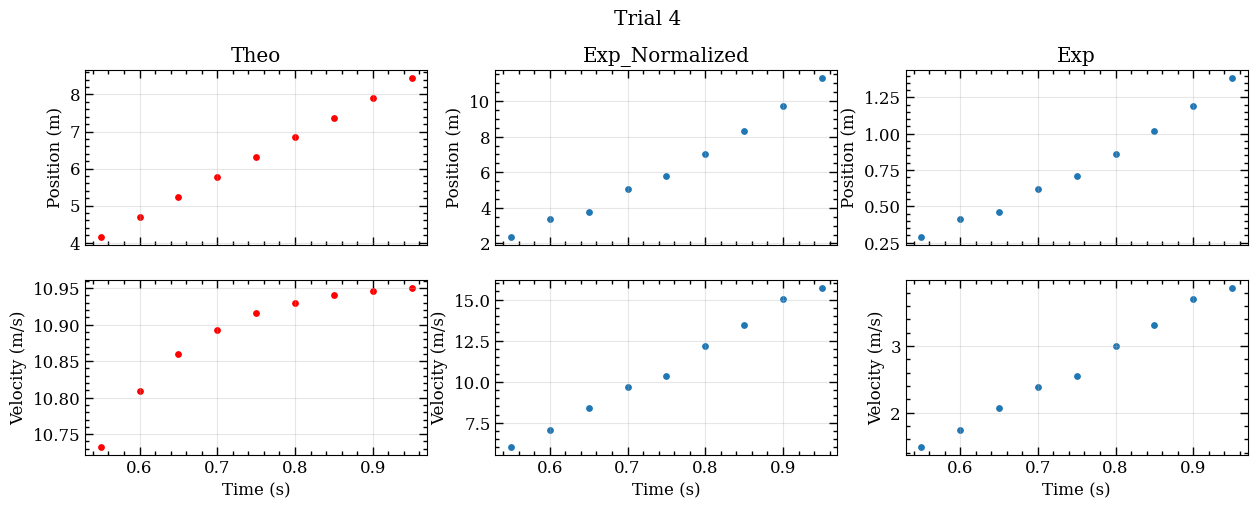

----


In [104]:
print("MEDIUM BALL")
# Theoretical
y_theo_list_mb, v_theo_list_mb = [], []
y_exp_normalized_list_mb, v_exp_normalized_list_mb = [], []

# Results
y_chi2_mb, y_pvalue_mb = [], []
v_chi2_mb, v_pvalue_mb = [], []

for i, data in enumerate(mb_data):
  print(f"Trial {i}")
  idx = idx_mb
  # get ball data
  t = data["Time"].values # use this time intervals for theo for direct comparison
  y_exp = data["Position"]
  v_exp = data["Velocity"]

  # get theoretical x and v
  y_theo = position(t, kappa, radii[idx], masses[idx])
  v_theo = velocity(t, kappa, radii[idx], masses[idx])
  # normalize data for compatibility
  y_exp_normalized = y_exp * (np.sum(y_theo) / np.sum(y_exp))
  v_exp_normalized = v_exp * (np.sum(v_theo) / np.sum(v_exp))
  # get chi2 for position data
  y_chi2_stat, y_pvalue = chisquare(y_exp_normalized, y_theo)
  # get chi2 for velocity data
  v_chi2_stat, v_pvalue = chisquare(v_exp_normalized, v_theo)

  print(f"POSITION chi2: {y_chi2_stat} || p-value: {y_pvalue:.8f}")
  print(f"VELOCITY chi2: {v_chi2_stat} || p-value: {v_pvalue:.8f}")

  # Store results
  y_theo_list_mb.append(y_theo)
  v_theo_list_mb.append(v_theo)
  y_exp_normalized_list_mb.append(y_exp_normalized)
  v_exp_normalized_list_mb.append(v_exp_normalized)

  y_chi2_mb.append(y_chi2_stat)
  y_pvalue_mb.append(y_pvalue)
  v_chi2_mb.append(v_chi2_stat)
  v_pvalue_mb.append(v_pvalue)

  # Plot
  fig, ax = plt.subplots(2,3, figsize=(15,5), sharex="col")

  # Position
  ax[0,0].scatter(t, y_theo, s=15, color="red")
  ax[0,0].set_ylabel("Position (m)")
  ax[0,0].set_title("Theo")
  ax[0,0].grid(True, alpha=0.3)

  ax[0,1].scatter(t, y_exp_normalized, s=15)
  ax[0,1].set_ylabel("Position (m)")
  ax[0,1].set_title("Exp_Normalized")
  ax[0,1].grid(True, alpha=0.3)

  ax[0,2].scatter(t, y_exp, s=15)
  ax[0,2].set_ylabel("Position (m)")
  ax[0,2].set_title("Exp")
  ax[0,2].grid(True, alpha=0.3)

  # Velocity
  ax[1,0].scatter(t, v_theo, s=15, color="red")
  ax[1,0].set_xlabel("Time (s)")
  ax[1,0].set_ylabel("Velocity (m/s)")
  ax[1,0].grid(True, alpha=0.3)

  ax[1,1].scatter(t, v_exp_normalized, s=15)
  ax[1,1].set_xlabel("Time (s)")
  ax[1,1].set_ylabel("Velocity (m/s)")
  ax[1,1].grid(True, alpha=0.3)

  ax[1,2].scatter(t, v_exp, s=15)
  ax[1,2].set_xlabel("Time (s)")
  ax[1,2].set_ylabel("Velocity (m/s)")
  ax[1,2].grid(True, alpha=0.3)

  fig.suptitle(f"Trial {i}", y=1.0)
  plt.show()
  print("----")

#### Overlay

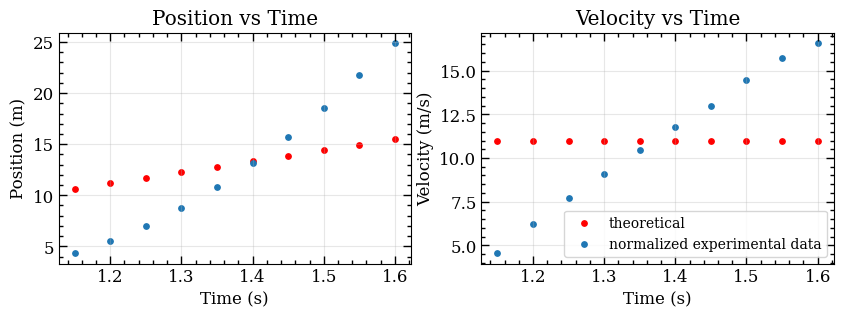

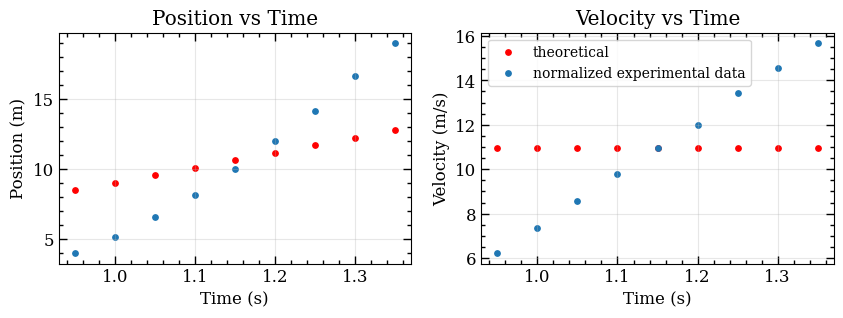

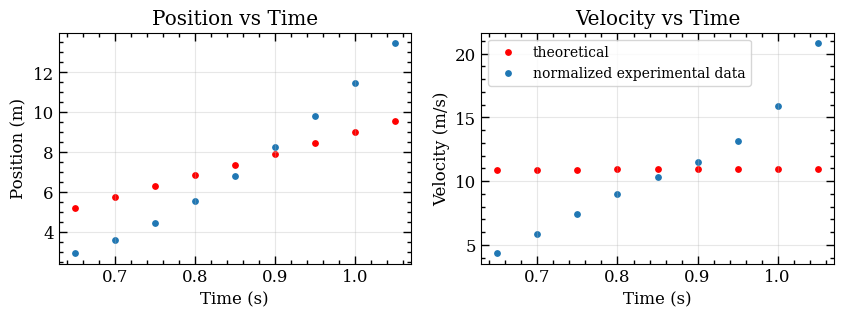

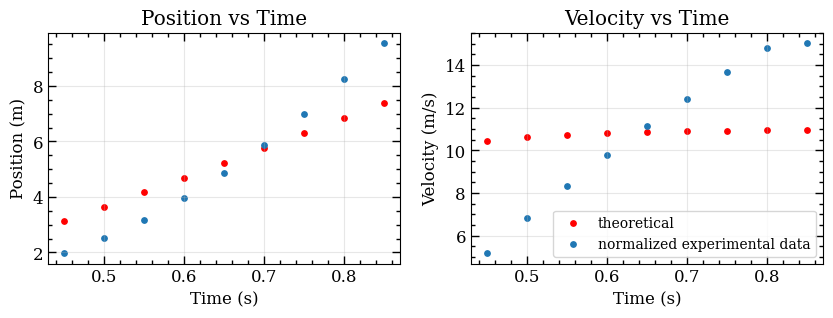

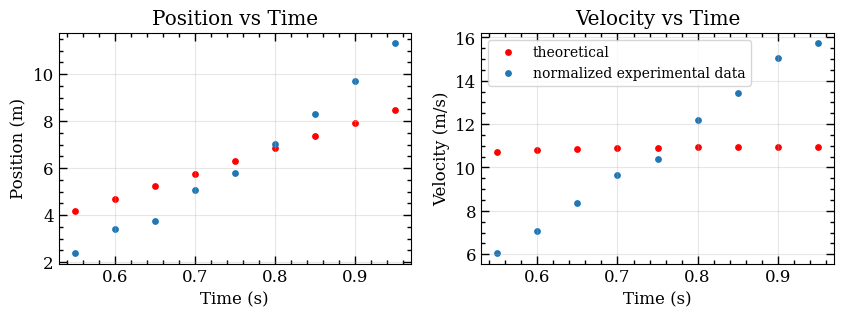

In [106]:
# Overlay normalized experimental data with theoretical
for i, data in enumerate(mb_data):
  t = data["Time"]
  fig, ax = plt.subplots(1,2,figsize=(10,3))
  ax[0].scatter(t, y_theo_list_mb[i], s=15, color="red", label="theoretical")
  ax[0].scatter(t, y_exp_normalized_list_mb[i], s=15, label="normalized experimental data")
  ax[0].set_xlabel("Time (s)")
  ax[0].set_ylabel("Position (m)")
  ax[0].set_title("Position vs Time")
  ax[0].grid(True, alpha=0.3)
  ax[1].legend(fontsize=10)

  ax[1].scatter(t, v_theo_list_mb[i], s=15, color="red", label="theoretical")
  ax[1].scatter(t, v_exp_normalized_list_mb[i], s=15, label="normalized experimental data")
  ax[1].set_xlabel("Time (s)")
  ax[1].set_ylabel("Velocity (m/s)")
  ax[1].set_title("Velocity vs Time")
  ax[1].grid(True, alpha=0.3)
  ax[1].legend(fontsize=10)

  plt.show()

#### Results

In [96]:
df_mb = pd.DataFrame()
df_mb["y_chi2"] = y_chi2_mb
df_mb["y_pvalue"] = y_pvalue_mb
df_mb["v_chi2"] = v_chi2_mb
df_mb["v_pvalue"] = v_pvalue_mb

df_mb

,y_chi2,y_pvalue,v_chi2,v_pvalue
0,20.073414,0.017465,13.587685,0.137767
1,10.624351,0.223906,7.734343,0.459841
2,5.151265,0.741293,19.318622,0.013245
3,2.145942,0.976208,8.411764,0.394315
4,3.150108,0.924587,8.413384,0.394165


In [99]:
df_mb.describe()

,y_chi2,y_pvalue,v_chi2,v_pvalue
count,5.000000,5.000000,5.000000,5.000000
mean,8.229016,0.576692,11.493160,0.279867
std,7.387473,0.431547,4.968240,0.193541
min,2.145942,0.017465,7.734343,0.013245
25%,3.150108,0.223906,8.411764,0.137767
50%,5.151265,0.741293,8.413384,0.394165
75%,10.624351,0.924587,13.587685,0.394315
max,20.073414,0.976208,19.318622,0.459841


### Big Ball

SMALL BALL
Trial 0
POSITION chi2: 2.727102247858296 || p-value: 0.84223572
VELOCITY chi2: 2.1390774570079434 || p-value: 0.90647341


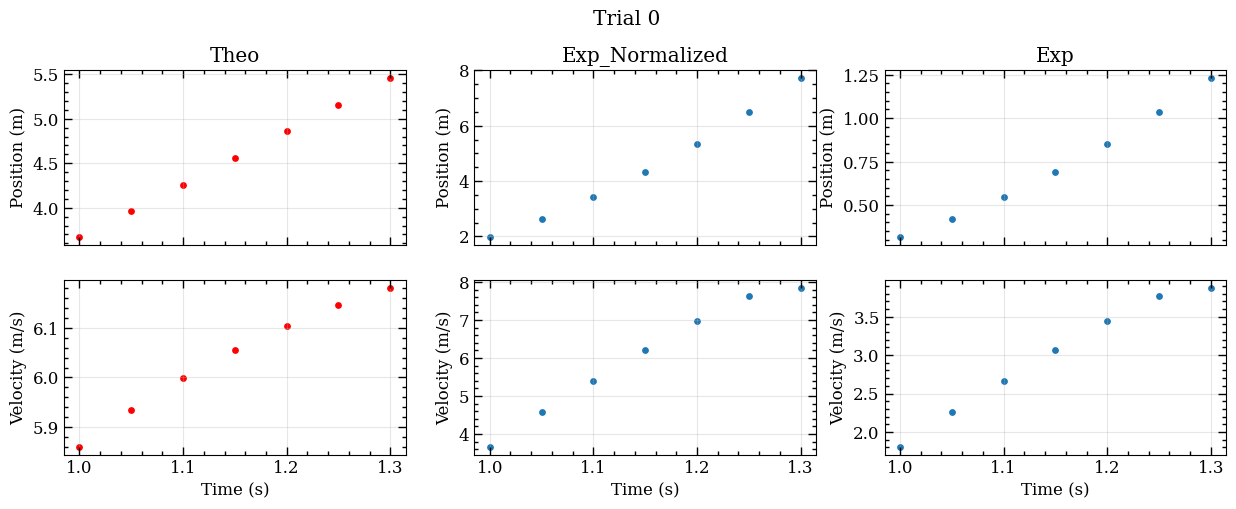

----
Trial 1
POSITION chi2: 7.257208166162503 || p-value: 0.29771443
VELOCITY chi2: 3.2430621369754826 || p-value: 0.77777960


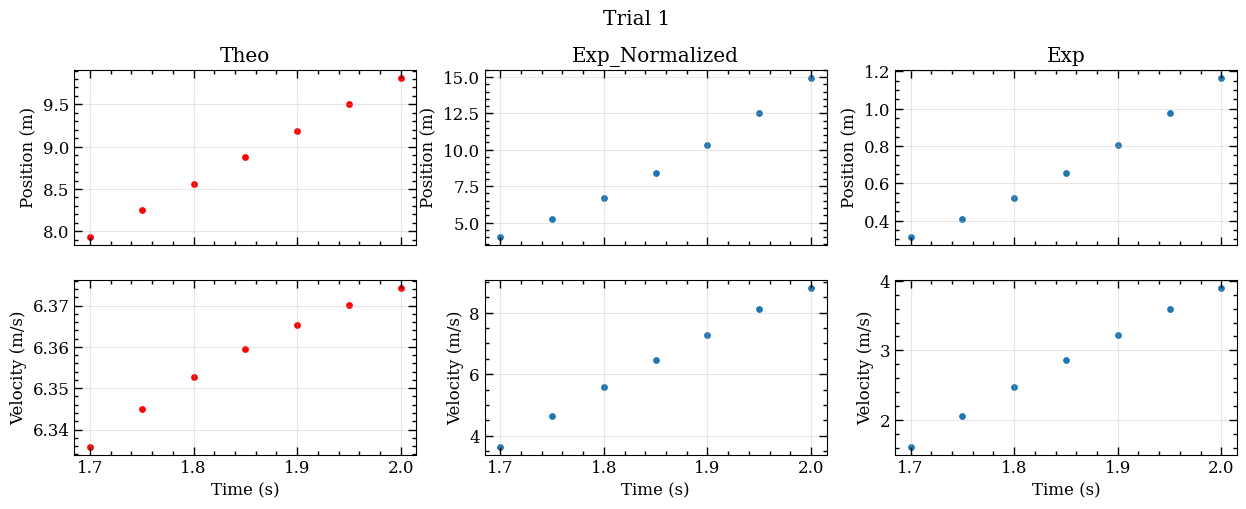

----
Trial 2
POSITION chi2: 7.1443049302059745 || p-value: 0.30770800
VELOCITY chi2: 3.6840872973573644 || p-value: 0.71933815


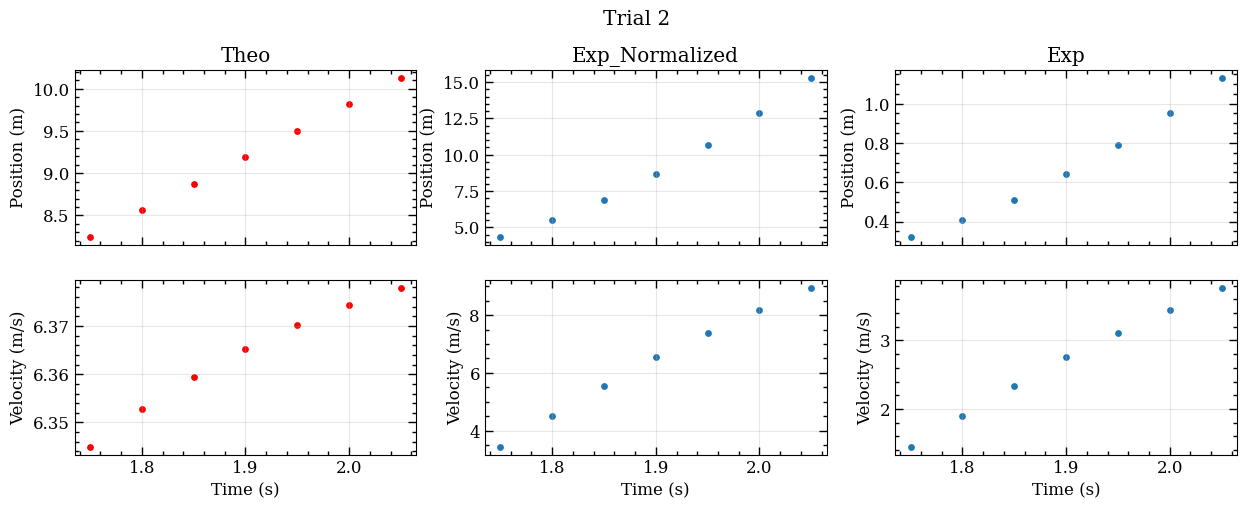

----
Trial 3
POSITION chi2: 1.0030877220797103 || p-value: 0.99477857
VELOCITY chi2: 2.6288030466891223 || p-value: 0.91708990


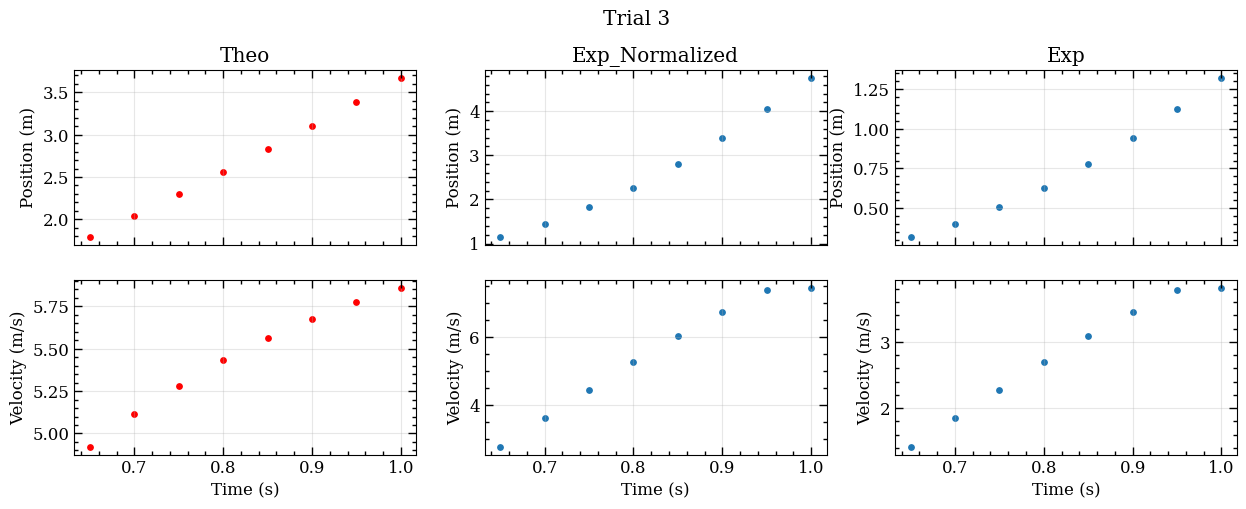

----
Trial 4
POSITION chi2: 0.27631597306921807 || p-value: 0.99992429
VELOCITY chi2: 2.0846987372149743 || p-value: 0.95500399


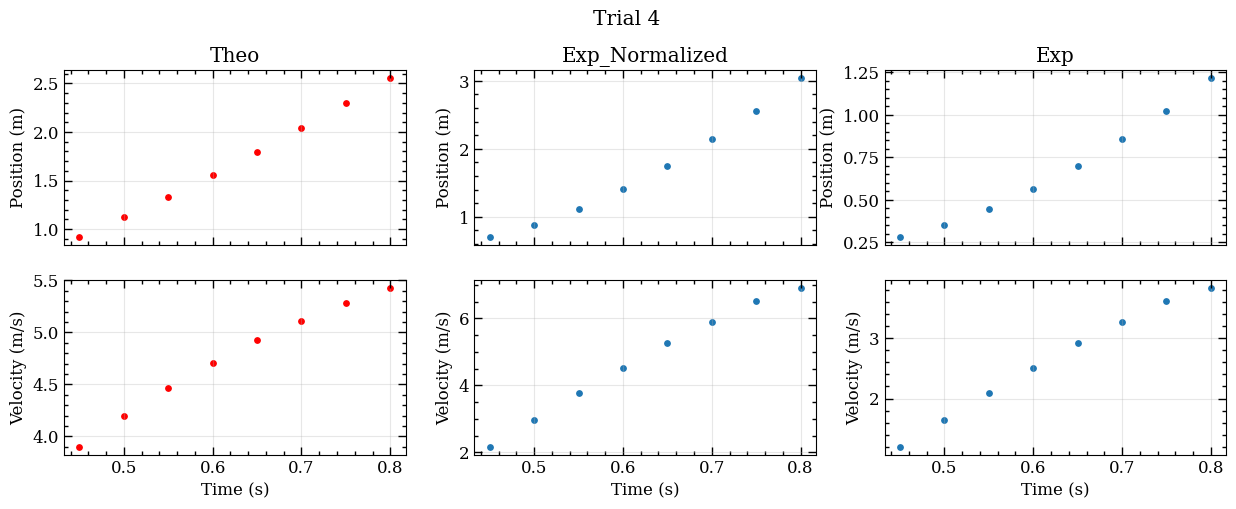

----


In [102]:
print("LARGE BALL")
# Theoretical
y_theo_list_bb, v_theo_list_bb = [], []
y_exp_normalized_list_bb, v_exp_normalized_list_bb = [], []

# Results
y_chi2_bb, y_pvalue_bb = [], []
v_chi2_bb, v_pvalue_bb = [], []

for i, data in enumerate(bb_data):
  print(f"Trial {i}")
  idx = idx_bb
  # get ball data
  t = data["Time"].values # use this time intervals for theo for direct comparison
  y_exp = data["Position"]
  v_exp = data["Velocity"]

  # get theoretical x and v
  y_theo = position(t, kappa, radii[idx], masses[idx])
  v_theo = velocity(t, kappa, radii[idx], masses[idx])
  # normalize data for compatibility
  y_exp_normalized = y_exp * (np.sum(y_theo) / np.sum(y_exp))
  v_exp_normalized = v_exp * (np.sum(v_theo) / np.sum(v_exp))
  # get chi2 for position data
  y_chi2_stat, y_pvalue = chisquare(y_exp_normalized, y_theo)
  # get chi2 for velocity data
  v_chi2_stat, v_pvalue = chisquare(v_exp_normalized, v_theo)

  print(f"POSITION chi2: {y_chi2_stat} || p-value: {y_pvalue:.8f}")
  print(f"VELOCITY chi2: {v_chi2_stat} || p-value: {v_pvalue:.8f}")

  # Store results
  y_theo_list_bb.append(y_theo)
  v_theo_list_bb.append(v_theo)
  y_exp_normalized_list_bb.append(y_exp_normalized)
  v_exp_normalized_list_bb.append(v_exp_normalized)

  y_chi2_bb.append(y_chi2_stat)
  y_pvalue_bb.append(y_pvalue)
  v_chi2_bb.append(v_chi2_stat)
  v_pvalue_bb.append(v_pvalue)

  # Plot
  fig, ax = plt.subplots(2,3, figsize=(15,5), sharex="col")

  # Position
  ax[0,0].scatter(t, y_theo, s=15, color="red")
  ax[0,0].set_ylabel("Position (m)")
  ax[0,0].set_title("Theo")
  ax[0,0].grid(True, alpha=0.3)

  ax[0,1].scatter(t, y_exp_normalized, s=15)
  ax[0,1].set_ylabel("Position (m)")
  ax[0,1].set_title("Exp_Normalized")
  ax[0,1].grid(True, alpha=0.3)

  ax[0,2].scatter(t, y_exp, s=15)
  ax[0,2].set_ylabel("Position (m)")
  ax[0,2].set_title("Exp")
  ax[0,2].grid(True, alpha=0.3)

  # Velocity
  ax[1,0].scatter(t, v_theo, s=15, color="red")
  ax[1,0].set_xlabel("Time (s)")
  ax[1,0].set_ylabel("Velocity (m/s)")
  ax[1,0].grid(True, alpha=0.3)

  ax[1,1].scatter(t, v_exp_normalized, s=15)
  ax[1,1].set_xlabel("Time (s)")
  ax[1,1].set_ylabel("Velocity (m/s)")
  ax[1,1].grid(True, alpha=0.3)

  ax[1,2].scatter(t, v_exp, s=15)
  ax[1,2].set_xlabel("Time (s)")
  ax[1,2].set_ylabel("Velocity (m/s)")
  ax[1,2].grid(True, alpha=0.3)

  fig.suptitle(f"Trial {i}", y=1.0)
  plt.show()
  print("----")

#### Overlay

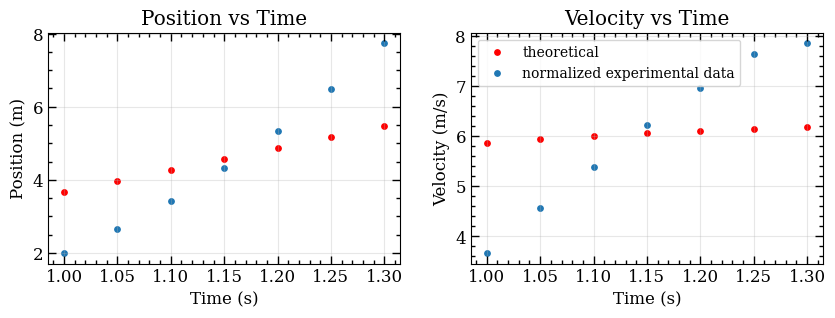

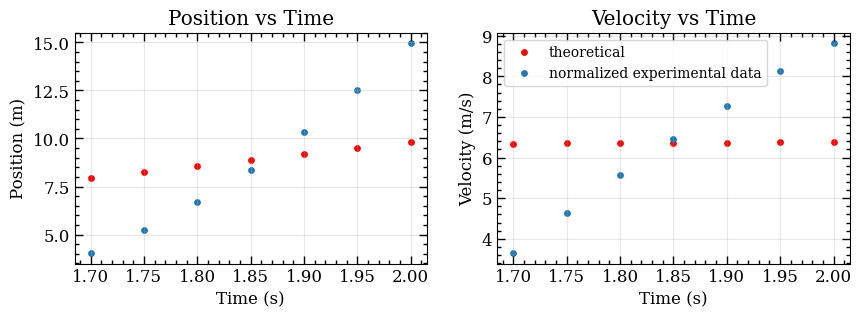

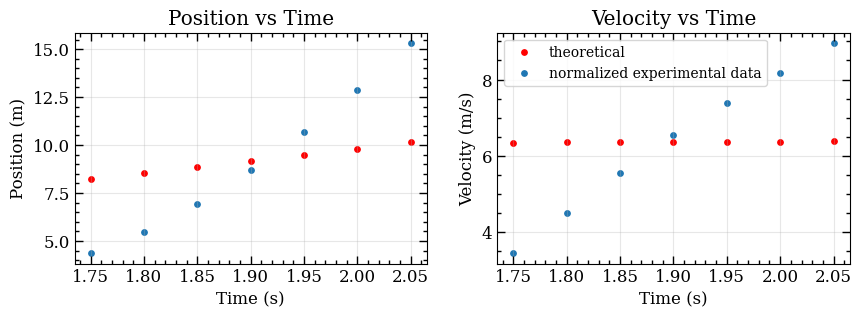

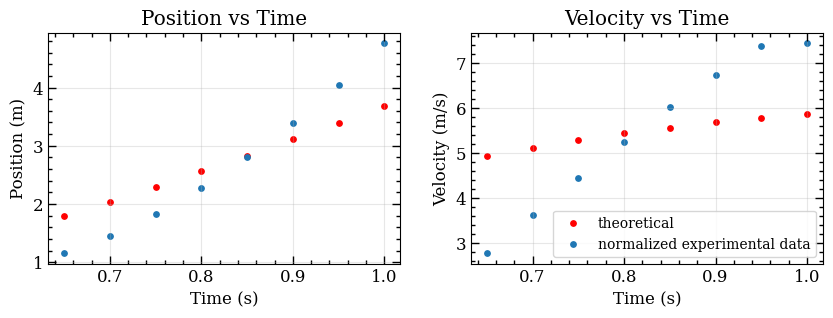

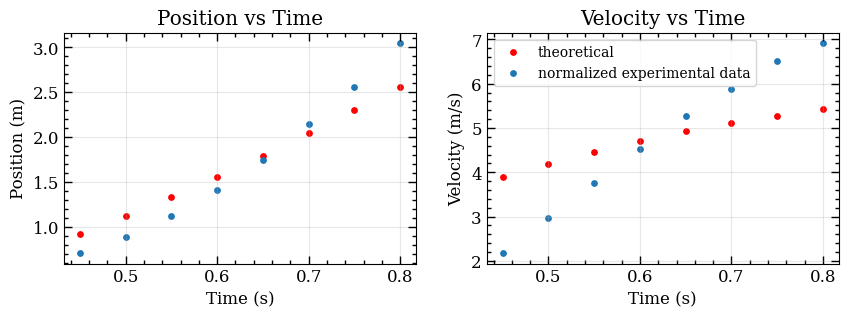

In [110]:
# Overlay normalized experimental data with theoretical
for i, data in enumerate(bb_data):
  t = data["Time"]
  fig, ax = plt.subplots(1,2,figsize=(10,3))
  ax[0].scatter(t, y_theo_list_bb[i], s=15, color="red", label="theoretical")
  ax[0].scatter(t, y_exp_normalized_list_bb[i], s=15, label="normalized experimental data")
  ax[0].set_xlabel("Time (s)")
  ax[0].set_ylabel("Position (m)")
  ax[0].set_title("Position vs Time")
  ax[0].grid(True, alpha=0.3)
  ax[1].legend(fontsize=10)

  ax[1].scatter(t, v_theo_list_bb[i], s=15, color="red", label="theoretical")
  ax[1].scatter(t, v_exp_normalized_list_bb[i], s=15, label="normalized experimental data")
  ax[1].set_xlabel("Time (s)")
  ax[1].set_ylabel("Velocity (m/s)")
  ax[1].set_title("Velocity vs Time")
  ax[1].grid(True, alpha=0.3)
  ax[1].legend(fontsize=10)

  plt.show()

#### Results

In [111]:
df_bb = pd.DataFrame()
df_bb["y_chi2"] = y_chi2_bb
df_bb["y_pvalue"] = y_pvalue_bb
df_bb["v_chi2"] = v_chi2_bb
df_bb["v_pvalue"] = v_pvalue_bb

df_bb

,y_chi2,y_pvalue,v_chi2,v_pvalue
0,2.727102,0.842236,2.139077,0.906473
1,7.257208,0.297714,3.243062,0.777780
2,7.144305,0.307708,3.684087,0.719338
3,1.003088,0.994779,2.628803,0.917090
4,0.276316,0.999924,2.084699,0.955004


In [113]:
df_bb.describe()

,y_chi2,y_pvalue,v_chi2,v_pvalue
count,5.000000,5.000000,5.000000,5.000000
mean,3.681604,0.688472,2.755946,0.855137
std,3.333795,0.357821,0.697494,0.101085
min,0.276316,0.297714,2.084699,0.719338
25%,1.003088,0.307708,2.139077,0.777780
50%,2.727102,0.842236,2.628803,0.906473
75%,7.144305,0.994779,3.243062,0.917090
max,7.257208,0.999924,3.684087,0.955004
